In [34]:
%matplotlib inline
from IPython.display import clear_output
from importlib import reload
from PIL import Image

import colorsys
import pandas as pd
import numpy as np
import time
import pickle
import random
import matplotlib.pyplot as plt

import ColorPalettes
import CatalogSearch
import ColorModel
reload(ColorPalettes)
reload(CatalogSearch)
reload(ColorModel)
import ColorPalettes
import CatalogSearch
import ColorModel

In [35]:
input_outfit = ColorModel.outfit_input(location_type='local', location_path='/home/anna/Pictures/Selection_191.png')

input_outfit.get_color_palette()
input_outfit.get_two_pairs()
input_outfit.get_linear_diff_features()

model_filename = 'regression_model_linearDiff_RGBpredictors.p'
model_vec = pickle.load(open('models/'+model_filename, 'rb'))  # [model_R, model_G, model_B]

input_outfit.predict_color_matches(model_vec, predictor_set='rgb')



/home/anna/anaconda3/envs/conda3_env/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/anna/anaconda3/envs/conda3_env/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/anna/anaconda3/envs/conda3_env/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or 

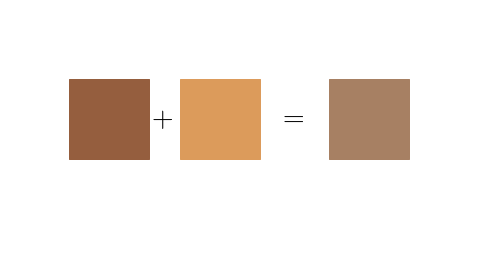

In [41]:
ind=0
MARKERSIZE=80
input_color1 = input_outfit.color_pair_0[0]
input_color2 = input_outfit.color_pair_0[1]
predicted_color = input_outfit.color_match_0

fig=plt.figure(figsize=(8,4))
ax=fig.add_subplot(111)

ax.axis('off')

ax.set_xlim([.5,3.5])
ax.set_ylim([8,12])

ax.plot([1],[10], 's', markersize=MARKERSIZE, color=np.array(input_color1)/255. )
ax.plot([1.75],[10], 's', markersize=MARKERSIZE, color=np.array(input_color2)/255. )
ax.annotate('+', xycoords='data', xy=(1.37,10), fontsize=30,  ha="center", va="center")
ax.annotate('=', xycoords='data', xy=(2.25,10), fontsize=30,  ha="center", va="center")
ax.plot([2.75],[10], 's', markersize=MARKERSIZE, color=np.array(predicted_color) )


In [37]:
inventory_df = pd.read_pickle('full_inventory.p')

In [43]:
match_img_url, match_product_url, match_dist = ColorModel.get_catalog_match(predicted_color, inventory_df, category='accessory_bag')

In [44]:
print(match_img_url)

https://n.nordstrommedia.com/ImageGallery/store/product/Zoom/17/_100945117.jpg?fit=fill&fm=jpg&dpr=2&h=368&w=240&quality=45&tradecacheforcash=yes
